In [250]:
import torch
import matplotlib.pyplot as plt
from math import sqrt


learning_rate = 0.1
weight_decay = 0.01
beta_1 = 0.9
beta_2 = 0.999
num_iterations = 100
use_momentum = True


def initialize_parameters():
    x = torch.tensor([3], requires_grad=False, dtype=torch.float32)
    w = torch.randn(1, requires_grad=True, dtype=torch.float32)
    m = torch.zeros(1, dtype=torch.float32)  # First moment (mean of gradients)
    v = torch.zeros(1, dtype=torch.float32)  # Second moment (mean of squared gradients)
    y = torch.tensor([0], requires_grad=False, dtype=torch.float32)
    return x,y,w,m,v

def SGD(learning_rate,w):
    #SGD
    with torch.no_grad():
        w -= learning_rate * w.grad
        return w
    
def SGDM(learning_rate,w,v,b):
    #SGD with Momentum
    with torch.no_grad():
        v = (b *v) + w.grad
        w -= learning_rate * v
        return w,v
    
def RMSprop(learning_rate,w,v,b):
    with torch.no_grad():
        grad = w.grad
        v = (b*v) + (1-b) * grad**2
        w -= learning_rate* grad / (v.sqrt()+1e-8) 
        return w,v
        
def AdaGrad(learning_rate,w,t):
    with torch.no_grad():
        grad = w.grad
        learning_rate = learning_rate / (1 + (t-1)* 0.1)

        w_big = w + grad**2
        w -= learning_rate* grad / (w_big.sqrt()+1e-8)
        return w
    
def Adam(learning_rate,w,b,b2,v,m,t):
    with torch.no_grad():
        m = (b * m) + (1-b) *w.grad
        v = (b2*v) + (1-b2) *w.grad**2
        m_t = m/(1-b**t)
        v_t = v/(1-b2**t)
        w -= learning_rate * m_t / (v_t.sqrt()+1e-8)
        return w,m,v

def AdamW(learning_rate,w,b,b2,v,m,t,weight_decay):
    with torch.no_grad():
        m = (b * m) + (1-b) *w.grad
        v = (b2*v) + (1-b2) *w.grad**2
        m_t = m/(1-b**t)
        v_t = v/(1-b2**t)
        w -= (learning_rate * m_t / (v_t.sqrt()+1e-8))+weight_decay*w
        return w,m,v
    
    
def cost_function(w,y,x):
    f = (w - x) ** 2
    loss = torch.nn.functional.binary_cross_entropy_with_logits(f, y)
    return f,loss
    


Optimizer:


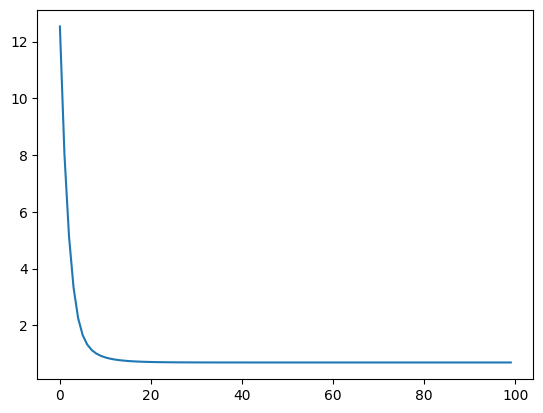

In [251]:
x,y,w,m,v = initialize_parameters()

#SGD
sgd_loss = []
print("Optimizer:")
for i in range(1,num_iterations+1):
    # Forward pass: compute f(x)
    f,loss = cost_function(w,y,x)
    sgd_loss.append(loss.item())
    
    # Backward pass: compute gradient df/dw
    loss.backward()

    # Update w
    w= SGD(learning_rate,w)
       
    # Zero gradients for the next iteration
    w.grad.zero_()

    #print(f"Iteration {i+1}: w = {w.item():.4f}, f(w) = {f.item():.4f}")
plt.plot(sgd_loss)

Optimizer:


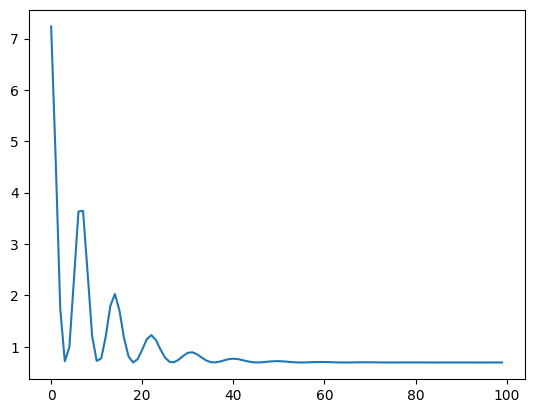

In [252]:
x,y,w,m,v = initialize_parameters()

#SGDM
sgdm_loss = []
print("Optimizer:")
for i in range(1,num_iterations+1):
    # Forward pass: compute f(x)
    f,loss = cost_function(w,y,x)
    sgdm_loss.append(loss.item())
    
    # Backward pass: compute gradient df/dw
    loss.backward()

    # Update w
    w,v = SGDM(learning_rate,w,v,beta_1)
       
    # Zero gradients for the next iteration
    w.grad.zero_()

    #print(f"Iteration {i+1}: w = {w.item():.4f}, f(w) = {f.item():.4f}")
plt.plot(sgdm_loss)

Optimizer:


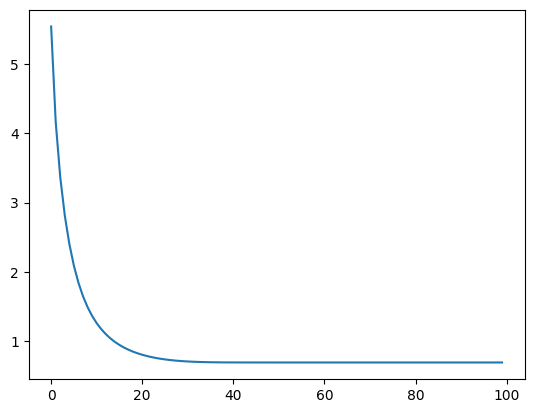

In [253]:
x,y,w,m,v = initialize_parameters()

#RMSprop
rms_loss = []
print("Optimizer:")
for i in range(1,num_iterations+1):
    # Forward pass: compute f(x)
    f,loss = cost_function(w,y,x)
    rms_loss.append(loss.item())
    
    # Backward pass: compute gradient df/dw
    loss.backward()

    # Update w
    
    w,v = RMSprop(learning_rate,w,v,beta_1)
       
    # Zero gradients for the next iteration
    w.grad.zero_()

    #print(f"Iteration {i+1}: w = {w.item():.4f}, f(w) = {f.item():.4f}")
plt.plot(rms_loss)

Optimizer:


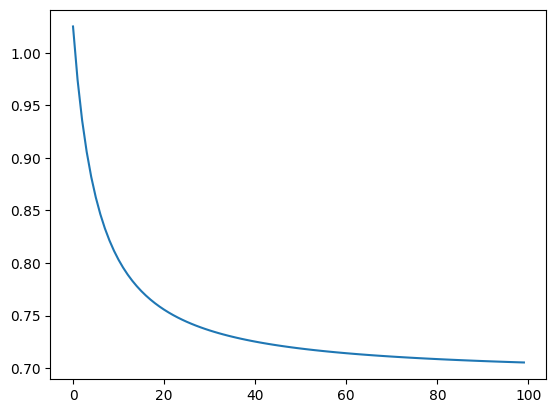

In [254]:
x,y,w,m,v = initialize_parameters()

#AdaGrad
AdaGrad_loss = []
print("Optimizer:")
for i in range(1,num_iterations+1):
    # Forward pass: compute f(x)
    f,loss = cost_function(w,y,x)
    AdaGrad_loss.append(loss.item())
    
    # Backward pass: compute gradient df/dw
    loss.backward()

    # Update w
    
    w = AdaGrad(learning_rate,w,i)
       
    # Zero gradients for the next iteration
    w.grad.zero_()

    #print(f"Iteration {i+1}: w = {w.item():.4f}, f(w) = {f.item():.4f}")
plt.plot(AdaGrad_loss)

Optimizer:


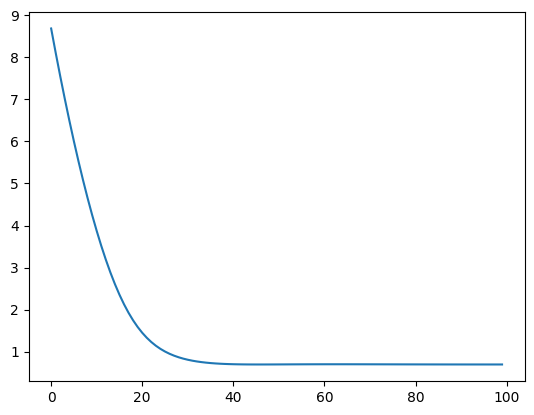

In [255]:
x,y,w,m,v = initialize_parameters()

#Adam
Adam_loss = []
print("Optimizer:")
for i in range(1,num_iterations+1):
    # Forward pass: compute f(x)
    f,loss = cost_function(w,y,x)
    Adam_loss.append(loss.item())
    
    # Backward pass: compute gradient df/dw
    loss.backward()

    # Update w
    
    w,m,v = Adam(learning_rate,w,beta_1,beta_2,v,m,i)
       
    # Zero gradients for the next iteration
    w.grad.zero_()

    #print(f"Iteration {i+1}: w = {w.item():.4f}, f(w) = {f.item():.4f}")
plt.plot(Adam_loss)

Optimizer:


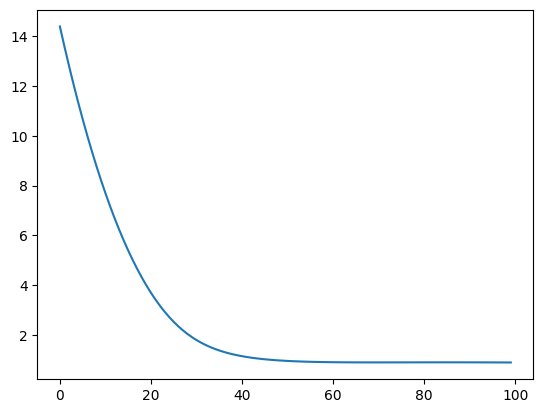

In [256]:
x,y,w,m,v = initialize_parameters()
#Adamw
Adamw_loss = []
print("Optimizer:")
for i in range(1,num_iterations+1):
    # Forward pass: compute f(x)
    f,loss = cost_function(w,y,x)
    Adamw_loss.append(loss.item())
    
    # Backward pass: compute gradient df/dw
    loss.backward()

    # Update w
    
    w,m,v = AdamW(learning_rate,w,beta_1,beta_2,v,m,i,weight_decay)
       
    # Zero gradients for the next iteration
    w.grad.zero_()

    #print(f"Iteration {i+1}: w = {w.item():.4f}, f(w) = {f.item():.4f}")
plt.plot(Adamw_loss)

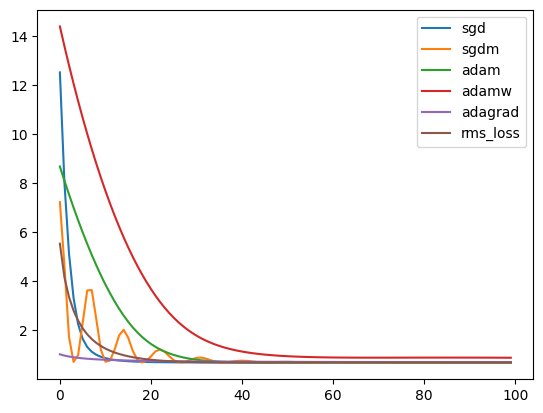

In [257]:
plt.plot(sgd_loss, label = "sgd")
plt.plot(sgdm_loss, label = "sgdm")
plt.plot(Adam_loss, label = "adam")
plt.plot(Adamw_loss, label = "adamw")
plt.plot(AdaGrad_loss, label = "adagrad")
plt.plot(rms_loss, label = "rms_loss")
plt.legend()
plt.show()